In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
file_path = r"C:\Users\bages\OneDrive\Documents\prediction.xlsx"
sheet_name = 'vw_ChurnData'

In [3]:
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [4]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12266-HAR,Female,46,No,Haryana,2,5,NaN,Yes,Yes,...,Bank Withdrawal,79.650002,3870.300049,0.0,0,429.119995,4299.419922,Stayed,Others,Others
1,12272-WES,Male,66,No,West Bengal,9,8,NaN,No,No,...,Credit Card,39.099998,1982.099976,0.0,130,0.000000,2112.100098,Stayed,Others,Others
2,12281-RAJ,Male,80,No,Rajasthan,14,25,NaN,Yes,Yes,...,Credit Card,78.099998,864.849976,0.0,0,194.259995,1059.109985,Stayed,Others,Others
3,12296-MAD,Male,65,Yes,Madhya Pradesh,14,2,NaN,No,No,...,Bank Withdrawal,45.000000,1228.650024,0.0,0,0.000000,1228.650024,Stayed,Others,Others
4,12303-BIH,Female,56,No,Bihar,7,14,NaN,Yes,Yes,...,Credit Card,88.550003,6362.350098,0.0,0,3319.199951,9681.549805,Stayed,Others,Others


Data preprocessing

In [6]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

 

In [7]:
# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

In [8]:
label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

In [9]:
# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

Data Training

In [11]:
# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

In [12]:
 

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

 

In [14]:
# Train the model

rf_model.fit(X_train, y_train)

 

RandomForestClassifier(random_state=42)

In [15]:
# Make predictions

y_pred = rf_model.predict(X_test)

In [16]:
 

# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 

Confusion Matrix:
[[793  53]
 [119 237]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       846
           1       0.82      0.67      0.73       356

    accuracy                           0.86      1202
   macro avg       0.84      0.80      0.82      1202
weighted avg       0.85      0.86      0.85      1202



In [17]:
# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

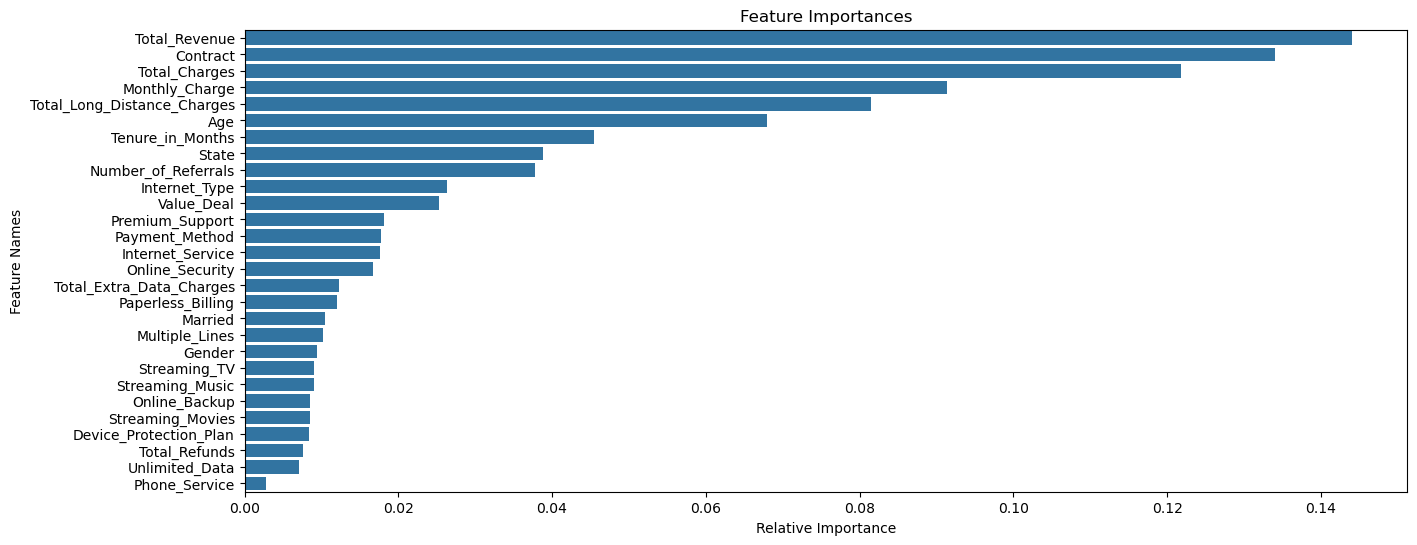

In [18]:
 

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

Using Model for Prediction on New Data

In [20]:
file_path = r"C:\Users\bages\OneDrive\Documents\prediction.xlsx"
sheet_name = 'vw_JoinData'

In [21]:
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

In [22]:
new_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12340-DEL,Female,51,Yes,Delhi,0,10,NaN,Yes,No,...,Credit Card,62.799999,62.799999,0.0,0,42.189999,104.989998,Joined,Others,Others
1,12469-AND,Male,24,Yes,Andhra Pradesh,11,4,NaN,Yes,No,...,Credit Card,55.299999,55.299999,0.0,0,36.689999,91.989998,Joined,Others,Others
2,16931-BIH,Female,39,Yes,Bihar,8,23,Deal 5,Yes,No,...,Credit Card,19.299999,19.299999,0.0,0,8.660000,27.959999,Joined,Others,Others
3,18829-TAM,Female,49,Yes,Tamil Nadu,4,31,Deal 5,Yes,No,...,Credit Card,18.799999,56.000000,0.0,0,19.830000,75.830002,Joined,Others,Others
4,22765-MAH,Female,40,Yes,Maharashtra,6,16,Deal 5,Yes,No,...,Bank Withdrawal,19.450001,19.450001,0.0,0,16.440001,35.889999,Joined,Others,Others


In [23]:
original_data = new_data.copy()
customer_ids = new_data['Customer_ID']

In [24]:
# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [25]:
# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

In [26]:
# Make predictions
new_predictions = rf_model.predict(new_data)

In [27]:
# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions


In [28]:
# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]